In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
review = pd.read_csv('hotel_review.csv')

In [3]:
review.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
review.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [5]:
review.corr()

""


In [6]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [7]:
review.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id10326,The room was kind of clean but had a VERY stro...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [8]:
review.corr()

""


In [9]:
review['Rating'] = ""

In [10]:
review.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Rating
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,


In [11]:
review["Rating"] = review['Is_Response'].replace({'not happy': 1, 'happy': 0}).astype(int)

In [12]:
review.tail()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Rating
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy,0
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy,1
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy,1
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy,1
38931,id49257,The Westin is a wonderfully restored grande da...,Mozilla,Desktop,happy,0


<AxesSubplot:xlabel='Device_Used', ylabel='Rating'>

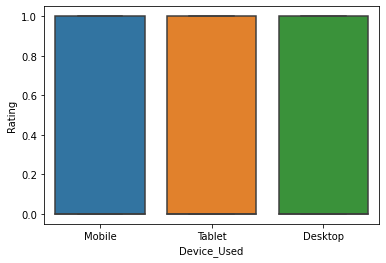

In [13]:
sns.boxplot(x='Device_Used',y='Rating',data=review)

In [14]:
review['Device_Used'].value_counts()

Desktop    15026
Mobile     14976
Tablet      8930
Name: Device_Used, dtype: int64

<AxesSubplot:xlabel='Browser_Used', ylabel='Rating'>

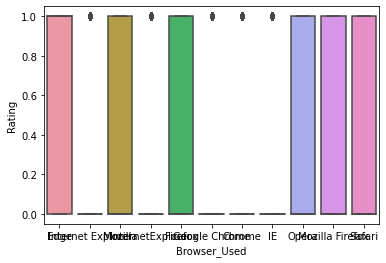

In [15]:
sns.boxplot(x='Browser_Used',y='Rating',data=review)

In [16]:
review['Browser_Used'].value_counts()

Firefox              7367
Edge                 7134
Google Chrome        4659
InternetExplorer     4588
Mozilla Firefox      4328
Mozilla              3092
Chrome               2470
IE                   2439
Internet Explorer    2103
Safari                390
Opera                 362
Name: Browser_Used, dtype: int64

In [17]:
review['Is_Response'].value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [18]:
review['Rating'].value_counts()

0    26521
1    12411
Name: Rating, dtype: int64

In [21]:
#Create a function to find the polarity and subjectivity of each Top News
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

#Assign the Polarity and Subjectivity values to columns in the dataframe
review['Polarity'] = review['Description'].apply(pol)
review['Subjectivity'] = review['Description'].apply(sub)

#Show the data
review.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Rating,Polarity,Subjectivity
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,1,0.346190,0.643228
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,1,0.042363,0.528986
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,1,0.124969,0.527284
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,0,0.718500,0.739000
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,1,0.117192,0.533254


In [22]:
def getAnalysis(score):
    if score < 0 :
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
review['Sentiment'] = review['Polarity'].apply(getAnalysis)

#show the dataframe

review

,User_ID,Description,Browser_Used,Device_Used,Is_Response,Rating,Polarity,Subjectivity,Sentiment
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,1,0.346190,0.643228,Positive
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,1,0.042363,0.528986,Positive
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,1,0.124969,0.527284,Positive
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,0,0.718500,0.739000,Positive
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy,1,0.117192,0.533254,Positive
...,...,...,...,...,...,...,...,...,...
38927,id49253,We arrived late at night and walked in to a ch...,Edge,Desktop,happy,0,0.135526,0.606871,Positive
38928,id49254,The only positive impression is location and p...,InternetExplorer,Mobile,not happy,1,0.289711,0.523122,Positive
38929,id49255,Traveling with friends for shopping and a show...,Firefox,Mobile,not happy,1,0.124628,0.516636,Positive
38930,id49256,The experience was just ok. We paid extra for ...,Chrome,Desktop,not happy,1,0.330000,0.448889,Positive


C:\Users\Imaobong\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


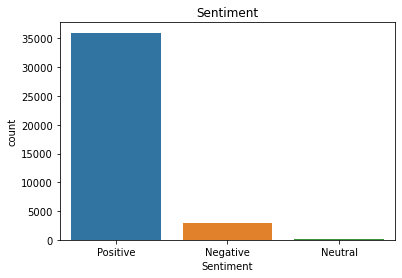

In [23]:
#Visualize the sentiment distribution

sns.countplot(review['Sentiment'])
plt.title('Sentiment')
plt.show()

In [24]:
X = review["Description"]
y = review["Sentiment"]

In [25]:
#Pre-pocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

from sklearn.pipeline import Pipeline

In [28]:
Model = Pipeline([('vectorizer', tvec), ('classifier', clf2)])

Model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression())])

In [29]:
from sklearn.metrics import confusion_matrix

predict = Model.predict(X_test)

In [30]:
confusion_matrix(predict, y_test)

array([[ 258,    3,   45],
       [   0,    0,    0],
       [ 312,   14, 7155]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [32]:
y_pred_acc = accuracy_score(predict, y_test)
y_pred_acc

0.9519712341081289

In [33]:
example = ['I hate the hotel']
pred_new = Model.predict(example)

In [34]:
pred_new

array(['Negative'], dtype=object)

In [37]:
pickle.dump(Model, open('model.pkl', 'wb'))

model=pickle.load(open('model.pkl', 'rb'))

In [38]:
print(Model.predict(example))

['Negative']
